# 1. 분석환경 설정하기

## 경로설정

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# cd /content/drive/MyDrive/프로젝트/뿌셔뿌셔_쑥떡

## 라이브러리 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.cluster import KMeans

# 2. 데이터 불러오기

In [2]:
# 전처리된 데이터 불러오기
user_spec = pd.read_csv('pp_user_spec.csv')
log_data = pd.read_csv('pp_log_data.csv')

# 평가 데이터 불러오기
result = pd.read_csv('데이터분석분야_퓨처스부문_쑥떡_평가데이터.csv')

In [3]:
display(user_spec.info())
display(log_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215502 entries, 0 to 1215501
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   application_id            1215502 non-null  int64  
 1   user_id                   1215502 non-null  int64  
 2   gender                    1204773 non-null  float64
 3   insert_time               1215502 non-null  object 
 4   yearly_income             1215502 non-null  float64
 5   income_type               1215502 non-null  int64  
 6   employment_type           1215502 non-null  int64  
 7   houseown_type             1215502 non-null  int64  
 8   desired_amount            1215502 non-null  float64
 9   purpose                   1215502 non-null  int64  
 10  existing_loan_cnt         1051965 non-null  float64
 11  existing_loan_amt         950047 non-null   float64
 12  age                       1204773 non-null  float64
 13  continuous_service_month  1

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user_id    int64 
 1   event      int64 
 2   timestamp  object
dtypes: int64(2), object(1)
memory usage: 408.4+ MB


None

# 3. 사용 데이터 추출

In [4]:
# user_spec에서 6월만 추출
user_6 = user_spec[user_spec['insert_time'].str.contains('2022-06')]

# log_data에서 6월만 추출
log_6 = log_data[log_data['timestamp'].str.contains('2022-06')]

In [5]:
# user_6와 평가데이터 합치기 
user_result = pd.merge(user_6, result, on=['application_id'])

In [6]:
# user_result을 app0과 app1로 나누기
app0 = user_result[user_result['is_applied']==0]
app1 = user_result[user_result['is_applied']==1]

In [7]:
# 잘 분리되었는지 확인
display(app0['is_applied'].value_counts())
display(app1['is_applied'].value_counts())

0.0    69977
Name: is_applied, dtype: int64

1.0    1843097
Name: is_applied, dtype: int64

In [8]:
# 분리된 데이터프레임 각가의 user_id를 리스트로 저장
app0_id = list(app0['user_id'])
app1_id = list(app1['user_id'])

In [9]:
# 해당 user_id를 가진 log_data 추출
isin_id = log_6['user_id'].isin(app0_id)
log_0 = log_6.loc[isin_id]

isin_id = log_6['user_id'].isin(app1_id)
log_1 = log_6.loc[isin_id]

In [10]:
# app0과 log_0 합치기
all_0 = pd.merge(app0, log_0, on='user_id')
print('all_0')
display(all_0.isnull().sum())

# app1과 log_1 합치기
all_1 = pd.merge(app1, log_1, on='user_id')
print('\nall_1')
display(all_1.isnull().sum())

all_0


application_id              0
user_id                     0
gender                      0
insert_time                 0
yearly_income               0
income_type                 0
employment_type             0
houseown_type               0
desired_amount              0
purpose                     0
existing_loan_cnt           0
existing_loan_amt           0
age                         0
continuous_service_month    0
insert_hour                 0
pr                          0
credit_rate                 0
product_id                  0
is_applied                  0
event                       0
timestamp                   0
dtype: int64


all_1


application_id              0
user_id                     0
gender                      0
insert_time                 0
yearly_income               0
income_type                 0
employment_type             0
houseown_type               0
desired_amount              0
purpose                     0
existing_loan_cnt           0
existing_loan_amt           0
age                         0
continuous_service_month    0
insert_hour                 0
pr                          0
credit_rate                 0
product_id                  0
is_applied                  0
event                       0
timestamp                   0
dtype: int64

In [11]:
all_0.drop(['insert_time','timestamp'], axis=1, inplace=True)
all_1.drop(['insert_time','timestamp'], axis=1, inplace=True)

In [12]:
all_0.to_csv('all_0.csv', index=False)
all_1.to_csv('all_1.csv', index=False)

# 4. Clustering

## all_0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
all_0 = pd.read_csv('all_0.csv')

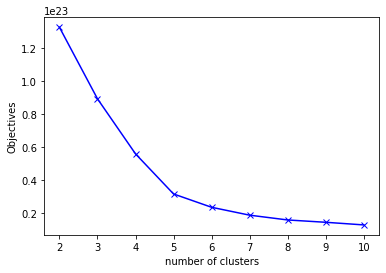

In [3]:
# Elbow 

Objectives = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(all_0)
    Objectives.append(km.inertia_)

plt.plot(K, Objectives, 'bx-')
plt.xlabel('k')
plt.ylabel('Objectives')
plt.xlabel('number of clusters')
plt.show() 

군집의 수 결정 방법: elbow method  
- 군집의 개수와 군집내 변동의 합을 그래프로 나타내고, 변동량의 변화가 작아지는 지점의 군집의 수를 적정 군집의 수로 결정함  

> Elbow Method를 이용하여 최적의 군집의 수는 5로 결정함

In [4]:
model = KMeans(
    n_clusters=5,
    init="k-means++",
    max_iter=100,
    n_init=1
)
model.fit(all_0) # k-means alogorithm 적합
model.labels_ 

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
all_0['cluster'] = model.labels_ 
all_0.head()

,application_id,user_id,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,age,continuous_service_month,insert_hour,pr,credit_rate,product_id,is_applied,event,cluster
0,1614045,860410,1.0,45000000.0,1,3,2,15000000.0,1,1.0,20000000.0,46.0,0.0,11,1,7.0,258,0.0,1,0
1,1614045,860410,1.0,45000000.0,1,3,2,15000000.0,1,1.0,20000000.0,46.0,0.0,11,1,7.0,258,0.0,2,0
2,1614045,860410,1.0,45000000.0,1,3,2,15000000.0,1,1.0,20000000.0,46.0,0.0,11,1,7.0,258,0.0,7,0
3,1614045,860410,1.0,45000000.0,1,3,2,15000000.0,1,1.0,20000000.0,46.0,0.0,11,1,7.0,258,0.0,3,0
4,1614045,860410,1.0,45000000.0,1,3,2,15000000.0,1,1.0,20000000.0,46.0,0.0,11,1,7.0,258,0.0,10,0


In [25]:
all_mean = all_0.groupby(by='cluster').mean()
all_mean

,application_id,user_id,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,age,continuous_service_month,insert_hour,pr,credit_rate,product_id,is_applied,event
cluster,,,,,,,,,,,,,,,,,,,
0,1.097457e+06,481017.619974,0.681839,3.544231e+07,0.919143,2.178486,0.836999,2.076961e+07,0.412221,4.744937,5.998811e+07,43.816613,13.227133,9.724320,1.009062,5.258400,124.614910,0.0,4.476094
1,1.147709e+06,738476.201860,0.873488,3.172419e+08,1.231628,2.935814,0.855814,9.746977e+09,2.359070,2.393488,2.257730e+08,34.404651,1.797209,11.851163,1.000000,4.313488,136.486512,0.0,4.363721
2,1.008058e+06,739940.790687,0.862950,1.279637e+08,1.018533,2.962155,0.930385,3.268325e+09,0.995484,2.644915,3.114344e+07,36.430151,0.118829,12.480455,1.000000,5.332970,124.393552,0.0,4.503193
3,1.064354e+06,383410.822364,0.921444,4.871734e+09,0.609342,1.828025,0.334041,5.426752e+08,0.617127,10.732484,2.884643e+07,50.974522,5.859873,11.438783,1.000000,4.520170,137.546355,0.0,4.927813
4,1.140180e+06,597786.453463,0.726442,2.286299e+07,1.025899,2.982657,1.136085,1.216771e+09,1.152388,3.425483,2.709377e+07,39.713840,0.005781,15.138051,1.000000,4.899988,112.890276,0.0,4.597063


In [7]:
# 모델 평가

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print('Silhouette Coefficient: %.3f' % silhouette_score(all_0, model.labels_, sample_size=1000))

Silhouette Coefficient: 0.916


실루엣 계수가 가질 수 있는 값은 -1~1이며, 1에 가까울수록 군집화가 잘 되었음을 의미한다.
> 실루엣 계수가 0.916이므로 군집화가 잘 되었다고 할 수 있다.

In [33]:
for i in range(5) :
    print('cluster :',i)
    display(all_0[all_0['cluster']==i]['event'].value_counts())

cluster : 0


1     747891
6     740404
2     690171
10    597994
4     572572
3     450882
5     309521
7     264867
0       3467
8         28
Name: event, dtype: int64

cluster : 1


3     178
4     161
6     150
2     147
1     141
10    128
5     118
7      44
0       8
Name: event, dtype: int64

cluster : 2


1     1113
2     1013
10    1005
6      836
3      766
4      738
5      595
7      355
Name: event, dtype: int64

cluster : 3


10    284
6     238
1     219
2     198
4     182
3     123
5     100
7      69
Name: event, dtype: int64

cluster : 4


6     1392
1     1367
2     1218
10    1204
4     1062
3      985
5      775
7      641
0        5
Name: event, dtype: int64

## all_1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [8]:
all_1 = pd.read_csv('all_1.csv')

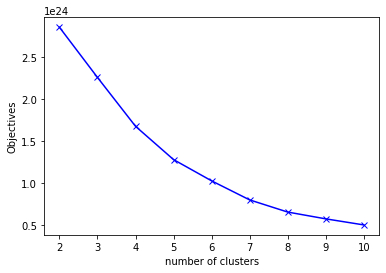

In [9]:
# Elbow 

Objectives = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(all_1)
    Objectives.append(km.inertia_)

plt.plot(K, Objectives, 'bx-')
plt.xlabel('k')
plt.ylabel('Objectives')
plt.xlabel('number of clusters')
plt.show() 

군집의 수 결정 방법: elbow method  
- 군집의 개수와 군집내 변동의 합을 그래프로 나타내고, 변동량의 변화가 작아지는 지점의 군집의 수를 적정 군집의 수로 결정함  

> Elbow Method를 이용하여 최적의 군집의 수는 5 또는 7로 추정할 수 있음  
> 두 가지 경우를 모두 진행하여 비교한다.

In [10]:
model1 = KMeans(
    n_clusters=7,
    init="k-means++",
    max_iter=100,
    n_init=1
)
model1.fit(all_1) # k-means alogorithm 적합
model1.labels_ 

array([0, 0, 0, ..., 4, 4, 4])

In [11]:
all_1['cluster'] = model1.labels_ 
all_1.head()

,application_id,user_id,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,age,continuous_service_month,insert_hour,pr,credit_rate,product_id,is_applied,event,cluster
0,954900,553686,1.0,30000000.0,2,0,1,30000000.0,1,1.0,27000000.0,54.0,184.0,14,1,3.0,20,1.0,1,0
1,954900,553686,1.0,30000000.0,2,0,1,30000000.0,1,1.0,27000000.0,54.0,184.0,14,1,3.0,20,1.0,2,0
2,954900,553686,1.0,30000000.0,2,0,1,30000000.0,1,1.0,27000000.0,54.0,184.0,14,1,3.0,20,1.0,4,0
3,954900,553686,1.0,30000000.0,2,0,1,30000000.0,1,1.0,27000000.0,54.0,184.0,14,1,3.0,20,1.0,3,0
4,954900,553686,1.0,30000000.0,2,0,1,30000000.0,1,1.0,27000000.0,54.0,184.0,14,1,3.0,20,1.0,5,0


In [12]:
all_1.groupby(by='cluster').mean()

,application_id,user_id,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,age,continuous_service_month,insert_hour,pr,credit_rate,product_id,is_applied,event
cluster,,,,,,,,,,,,,,,,,,,
0,1.084191e+06,441026.842839,0.675010,3.798874e+07,0.389033,0.292395,0.793484,2.770495e+07,0.682978,3.652515,4.344098e+07,41.046870,41.611742,12.843782,1.006391,5.155996,147.398660,1.0,4.477584
1,8.803094e+05,492276.086121,0.854193,1.292992e+08,0.580987,0.143004,0.771390,4.595141e+09,1.161457,3.617287,1.410695e+08,40.276996,61.605785,12.357242,1.014439,4.635762,143.134978,1.0,4.741323
2,7.154373e+05,521340.628192,0.991439,9.462135e+09,0.043247,0.506273,1.522657,7.680148e+07,3.090627,5.552325,7.417387e+07,37.608266,117.799262,15.506716,1.000000,5.483395,150.815646,1.0,4.420664
3,1.072581e+06,469088.335753,0.867707,8.705309e+07,0.396272,0.119120,1.329821,6.560677e+07,0.742004,6.180656,4.046012e+08,43.264396,118.642423,12.857121,1.000128,4.230571,149.673548,1.0,4.508469
4,1.085703e+06,435713.657669,0.813276,5.839040e+07,0.239936,0.136023,1.202500,5.742526e+07,0.762604,5.734013,1.554481e+08,42.608299,83.508524,12.780952,1.003105,4.668182,150.683656,1.0,4.480752
5,1.262958e+06,557950.328230,0.902671,4.941294e+08,0.021502,0.423736,0.657904,9.862708e+09,0.482126,2.905634,3.920587e+07,36.703681,33.218402,12.355279,1.047297,5.509288,144.789956,1.0,4.493257
6,9.181245e+05,394473.396819,0.844286,1.338979e+09,0.299694,0.674676,1.664188,1.734729e+08,0.495525,2.960712,2.061953e+08,44.014344,56.627229,12.961926,1.000872,5.912318,156.767048,1.0,4.066487


In [13]:
# 모델 평가

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print('Silhouette Coefficient: %.3f' % silhouette_score(all_1, model1.labels_, sample_size=1000))

Silhouette Coefficient: 0.545


실루엣 계수가 가질 수 있는 값은 -1~1이며, 1에 가까울수록 군집화가 잘 되었음을 의미한다.
> 실루엣 계수가 0.545이므로 군집화가 잘 되었다고 보기에는 애매하다.

In [14]:
model2 = KMeans(
    n_clusters=5,
    init="k-means++",
    max_iter=100,
    n_init=1
)
model2.fit(all_1) # k-means alogorithm 적합
model2.labels_ 

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
all_1['cluster'] = model2.labels_ 
all_1.head()

,application_id,user_id,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,age,continuous_service_month,insert_hour,pr,credit_rate,product_id,is_applied,event,cluster
0,954900,553686,1.0,30000000.0,2,0,1,30000000.0,1,1.0,27000000.0,54.0,184.0,14,1,3.0,20,1.0,1,1
1,954900,553686,1.0,30000000.0,2,0,1,30000000.0,1,1.0,27000000.0,54.0,184.0,14,1,3.0,20,1.0,2,1
2,954900,553686,1.0,30000000.0,2,0,1,30000000.0,1,1.0,27000000.0,54.0,184.0,14,1,3.0,20,1.0,4,1
3,954900,553686,1.0,30000000.0,2,0,1,30000000.0,1,1.0,27000000.0,54.0,184.0,14,1,3.0,20,1.0,3,1
4,954900,553686,1.0,30000000.0,2,0,1,30000000.0,1,1.0,27000000.0,54.0,184.0,14,1,3.0,20,1.0,5,1


In [34]:
all_mean1 = all_1.groupby(by='cluster').mean()
all_mean1

,application_id,user_id,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,age,continuous_service_month,insert_hour,pr,credit_rate,product_id,is_applied,event
cluster,,,,,,,,,,,,,,,,,,,
0,1.093542e+06,428000.171375,0.792410,5.565454e+07,0.235200,0.133373,1.153192,3.909931e+07,0.698865,5.793084,1.400972e+08,42.995436,80.098034,12.761821,1.002714,4.823196,151.427595,1.0,4.486474
1,8.850879e+05,493230.595217,0.866612,1.359345e+08,0.626605,0.137693,0.748386,4.757995e+09,0.865572,3.760815,1.501743e+08,40.032718,65.622397,12.323266,1.015573,4.750441,142.349358,1.0,4.692985
2,1.262958e+06,557950.328230,0.902671,4.941294e+08,0.021502,0.423736,0.657904,9.862708e+09,0.482126,2.905634,3.920587e+07,36.703681,33.218402,12.355279,1.047297,5.509288,144.789956,1.0,4.493257
3,7.154373e+05,521340.628192,0.991439,9.462135e+09,0.043247,0.506273,1.522657,7.680148e+07,3.090627,5.552325,7.417387e+07,37.608266,117.799262,15.506716,1.000000,5.483395,150.815646,1.0,4.420664
4,1.061515e+06,469715.510489,0.864615,8.383562e+07,0.365983,0.113523,1.390587,5.261330e+07,0.683076,6.105625,3.808876e+08,42.919372,116.980064,12.654286,1.000198,4.261022,149.412930,1.0,4.485157
5,9.519087e+05,459167.559415,0.753403,6.982934e+07,0.317205,0.230511,0.901003,7.740638e+08,1.418611,3.068370,1.328263e+08,40.343985,78.238792,12.894323,1.007135,4.182060,147.156370,1.0,4.579910
6,9.214342e+05,395057.463127,0.843619,1.341551e+09,0.292409,0.676122,1.662749,1.719362e+08,0.491693,2.961869,2.058499e+08,44.012635,56.572358,12.952812,1.000876,5.927773,156.846221,1.0,4.062106
7,1.083273e+06,443332.814739,0.672348,3.731939e+07,0.400634,0.303983,0.777633,2.826953e+07,0.699164,3.507139,3.970070e+07,40.844270,39.597994,12.867499,1.006749,5.144358,146.982722,1.0,4.476290


In [17]:
# 모델 평가

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print('Silhouette Coefficient: %.3f' % silhouette_score(all_1, model2.labels_, sample_size=1000))

Silhouette Coefficient: 0.562


실루엣 계수가 가질 수 있는 값은 -1~1이며, 1에 가까울수록 군집화가 잘 되었음을 의미한다.
> 실루엣 계수가 0.562이므로 군집화가 잘 되었다고 보기에는 애매하다.

군집의 수가 5일 때와 7일 때를 비교했을 때, 5인 경우의 실루엣 계수가 1에 더 가깝기 때문에  
최적의 군집의 수를 5로 결정한다.

is_applied가 0일 때와 1일 때 모두 최적의 군집 수가 5이므로  
군집에 따른 제안 메세지를 생성한다.